In [1]:

import matplotlib.pyplot as plt
import numpy as np

import sys, os
import subprocess

#print(os.getcwd())
sys.path.insert(0,os.getcwd()+'/../')

import plot_result

mem_t_dir = os.getcwd()+'/../MFlibrary_testing/stdcellTesting/membrane_cap'
plot_r = plot_result.plot_prn

lib = "./../../Components/verilogA_build/lib/MFXyce.so"

def run_xyce(lib, cir):
    if not os.path.isfile(lib):
        raise ValueError(lib + " library file does not exist") 

    if not os.path.isfile(cir):
        raise ValueError(cir + " not able to find ciruit file") 

    cir_root, fname = os.path.split(cir)
    
    subprocess.run(['sh', './../run_test.sh', lib, cir, cir_root])

def run_and_plot(lib, cir, plot_type=None, plot_nodes=None):

    cir_a = mem_t_dir+'/'+cir
    prn   = mem_t_dir+'/results/'+cir+'.prn'
    
    run_xyce(lib, cir_a)
    
    # only the definition above needs to be changed
    run_xyce(lib, cir_a)
    plot_r(prn, plot_type=plot_type, plot_nodes=plot_nodes)

1.8560454545454544e-16


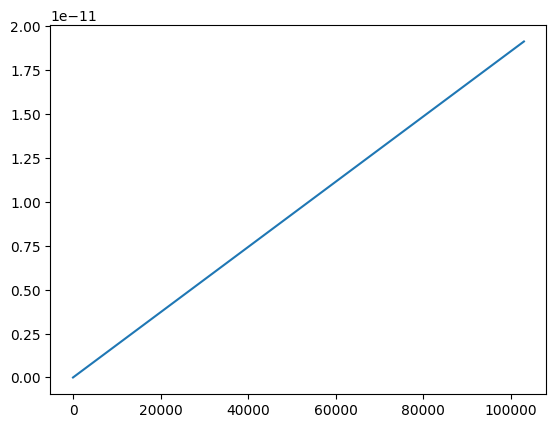

D:5.6410256410256435e-09
103000.0


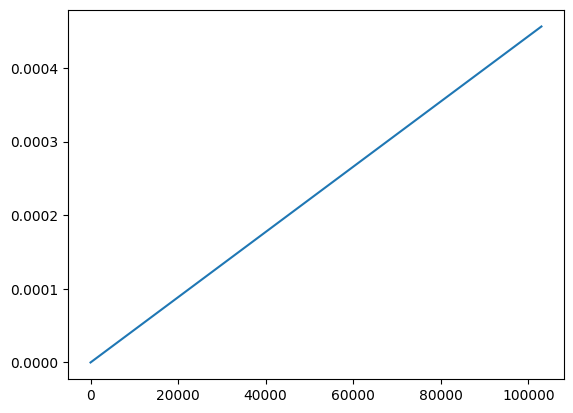

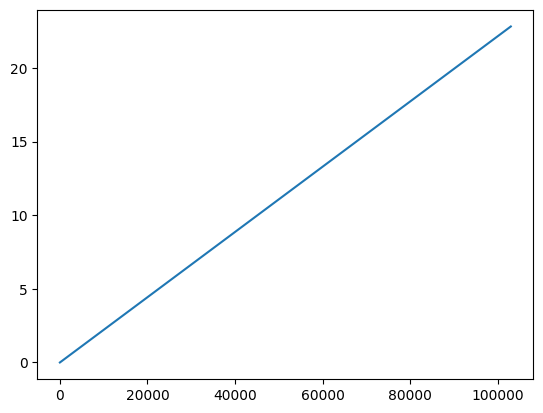

15 PSI


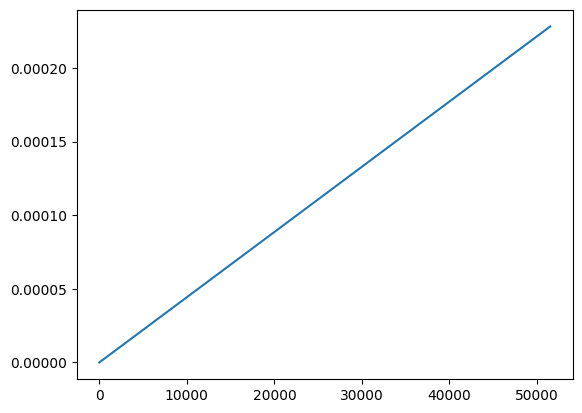

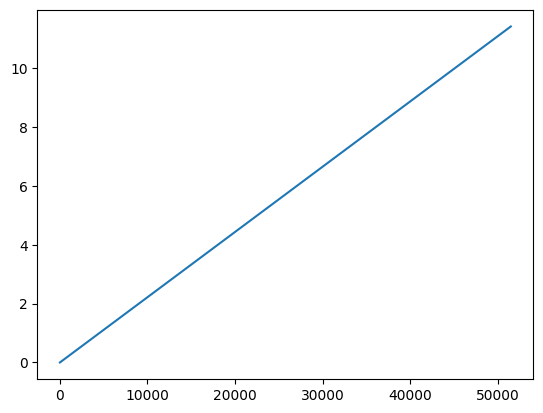

'\nModeling shows that ~6 PSI we make contact with the bottom surface\n'

In [53]:
# membrane calcs

r = 200e-6
E = 7.7e6
v = 0.3
th= 20e-6

D = 3.141 * r**(6) * (1 - v**2)/(16*E*th**3)

cap = D

print(cap)

P = np.linspace(0, 103e3, 1000)

V = P*cap

plt.plot(P, V)
plt.show()

D = E*th**3/(12*(1-v**2))

R = r

w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2

wd = w(0, P)

# 30 PSI
print("D:"+str(D))
print(max(P))
plt.plot(P, wd)
plt.show()

wh = wd/th

plt.plot(P, wh)
plt.show()


# 15 PSI
print("15 PSI")
P = np.linspace(0, 103e3/2, 1000)
wd = w(0, P)
plt.plot(P, wd)
plt.show()

wh = wd/th

plt.plot(P, wh)
plt.show()


#Modeling shows that ~6 PSI we make contact with the bottom surface


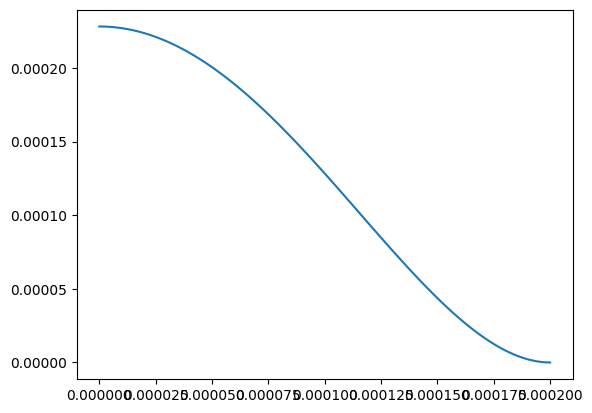

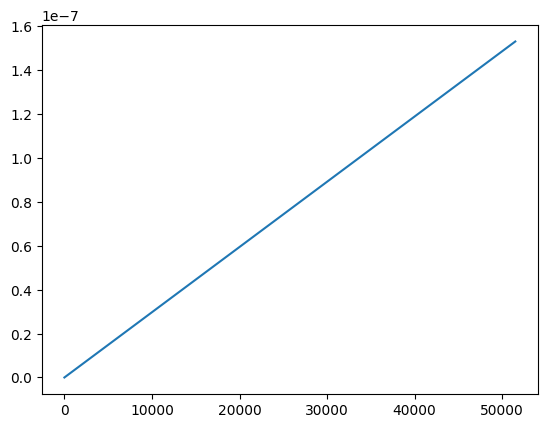

In [57]:
w = lambda r, p: p*R**4/(64*D) * (1 - (r/R)**2)**2

rad = np.linspace(0, r, 100)
Pr  = 103e3/2

w_defl = w(rad, Pr)

plt.plot(rad, w_defl)
plt.show()

vol = lambda r, p: p*R**4/(64*D) * (r - 2/3*r**3/R**2 + 1/5*r**5/R**4) * 2*3.141

pl_v = vol(r, P)

plt.plot(P, pl_v)

In [82]:
Pr  = 103e3
r1 = (-r**2 + r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2) )**(1/2)
r2 = (-r**2 - r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2) )**(1/2)
r3 = -(-r**2 + r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2))**(1/2)
r4 = -(-r**2 - r**2*(1+20e-6-Pr*r**4/(64*D))**(1/2))**(1/2)

Pr = 103e3
r11= (-r**2 + 4*(20*D/Pr)**(1/2) )**(1/2)

print([r1, r2, r3, r4])
print(r11)

[(1.8092574526420542e-22+2.9547416510649923e-06j), (1.7318176070448992e-20+0.00028282727856728294j), (-1.8092574526420542e-22-2.9547416510649923e-06j), (-1.7318176070448992e-20-0.00028282727856728294j)]
0.0020362585379484943


In [60]:
a = 2**8
b = 4**(1/2)
print(a)
print(b)

256
2.0


plot: mem_cap_test_v_0_1.cir.prn


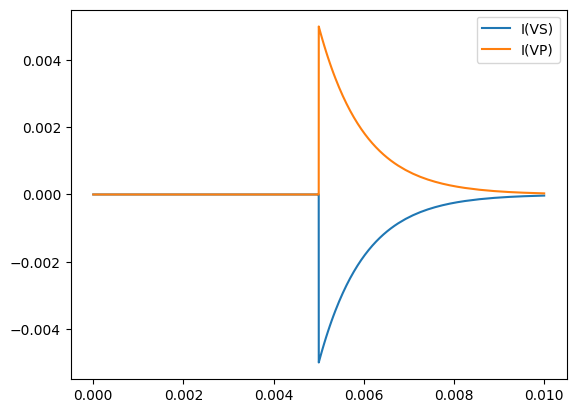

Index(['TIME', 'I(VS)', 'I(VP)'], dtype='object')
-4.3352553740586976e-07
6.282e-08


In [13]:
prn_f = mem_t_dir+'/results/mem_cap_test_v_0_1.cir.prn'
plot_r(prn_f)

res = plot_result.load_prn(prn_f)

print(res.columns)

tim  = res['TIME'] 
I_vp = res['I(VP)']

def sum_cur(time, i):
    i_sum = 0
    for ind, t in enumerate(time):
        if ind == 0:
            continue
        else:
            i_sum += (i[ind] - i[ind-1])*(time[ind] - time[ind-1])
    return i_sum

I_vp_t = sum_cur(tim, I_vp)

print(I_vp_t)

est_vol = 200e-6 * 3.141 * 2 * 50e-6
print(est_vol)

plot: mem_cap_test_v_0_1_0_1.cir.prn


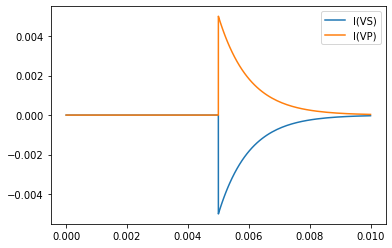

In [3]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_0_1.cir.prn')

plot: mem_cap_test_v_0_1_4.cir.prn


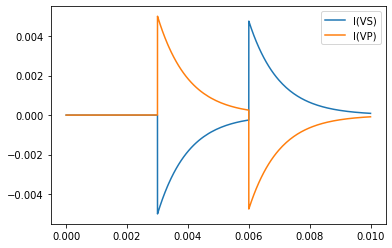

plot: mem_cap_test_v_0_1_4_V.cir.prn


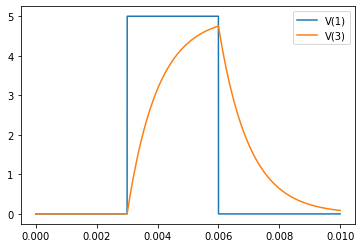

In [4]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4.cir.prn', 'flow')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_1_4_V.cir.prn')

plot: mem_cap_test_v_0_2_V.cir.prn


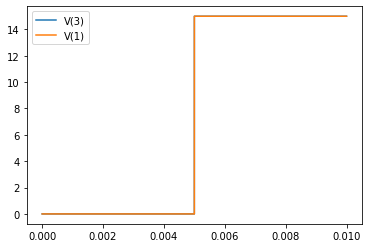

plot: mem_cap_test_v_0_2_I.cir.prn


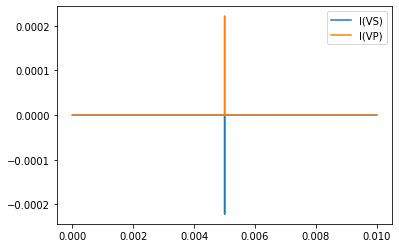

In [5]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2_V.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_2_I.cir.prn')

plot: mem_cap_test_v_0_3.cir.prn


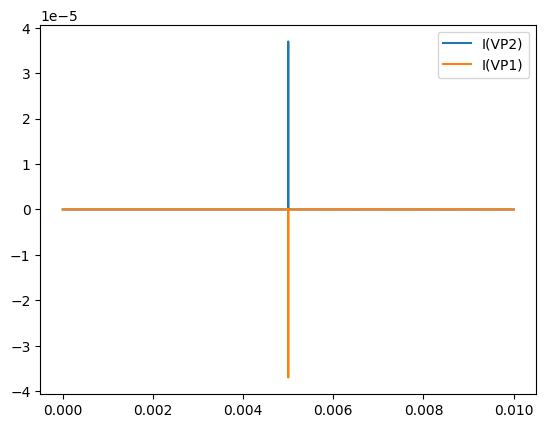

Index(['TIME', 'I(VP2)', 'I(VP1)'], dtype='object')
4.219168907139801e-14


In [11]:
prn_f = mem_t_dir+'/results/mem_cap_test_v_0_3.cir.prn'
plot_r(prn_f)

res = plot_result.load_prn(prn_f)

print(res.columns)

tim  = res['TIME'] 
I_vp = res['I(VP2)']

I_vp_t = sum_cur(tim, I_vp)

print(I_vp_t)

plot: mem_cap_test_v_0_4.cir.prn


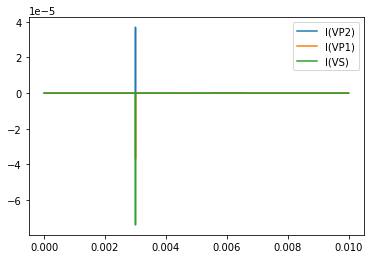

In [7]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_4.cir.prn')

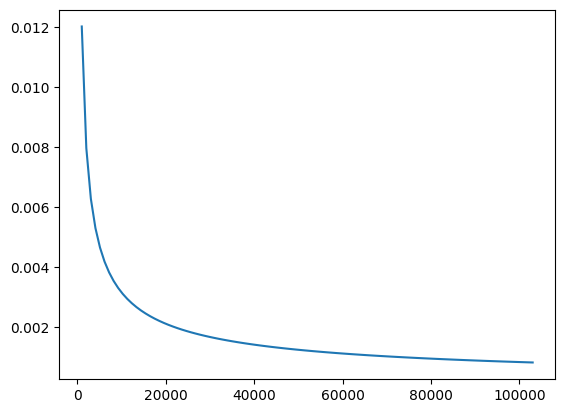

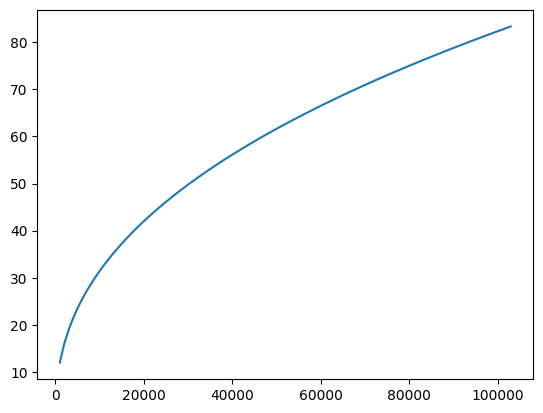

In [31]:
import numpy as np
import matplotlib.pyplot as plt


N_fit = 1.6020
m_fit = 0.41795

P = np.linspace(1000, 103e3, 100)

cap = m_fit*N_fit*P**(m_fit-1)

plt.plot(P, cap)
plt.show()

Q = P*cap

plt.plot(P, Q)
plt.show()

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5.cir.log
plot: mem_cap_test_v_0_5.cir.prn


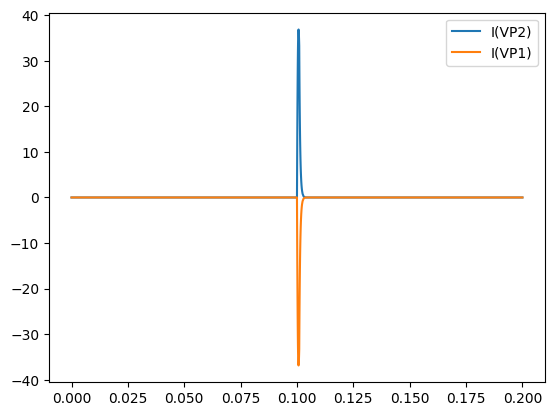

plot: mem_cap_test_v_0_5.cir.prn


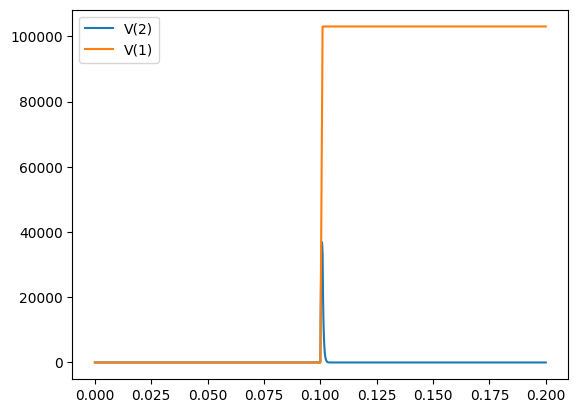

In [32]:
#plot_r(mem_t_dir+'/mem_cap_test_v_0_5.cir.prn')
#plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5.cir.prn')
cir = 'mem_cap_test_v_0_5.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_5_1.cir.log
plot: mem_cap_test_v_0_5_1.cir.prn


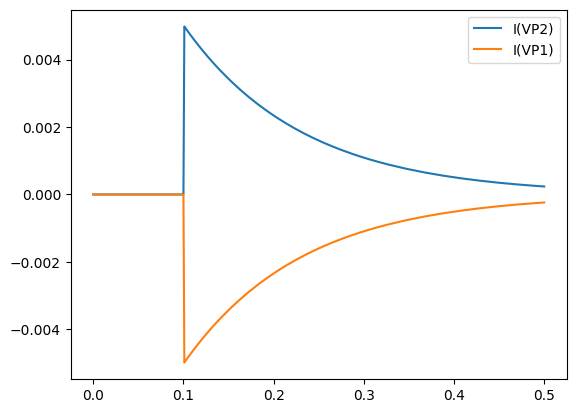

plot: mem_cap_test_v_0_5_1.cir.prn


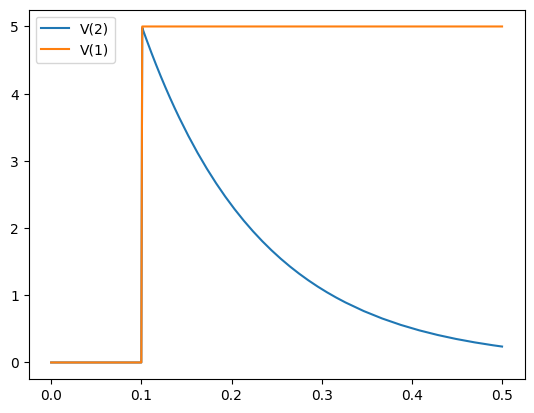

In [23]:
cir = 'mem_cap_test_v_0_5_1.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')

plot: mem_cap_test_v_0_5_1_I.cir.prn


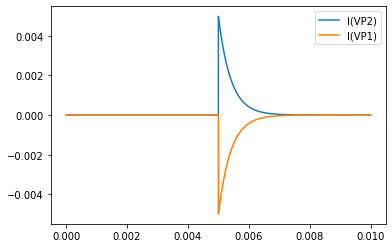

In [9]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_I.cir.prn')
#plot_r(mem_t_dir+'/mem_cap_test_v_0_5_1_I.cir.prn')

plot: mem_cap_test_v_0_5_1_V.cir.prn


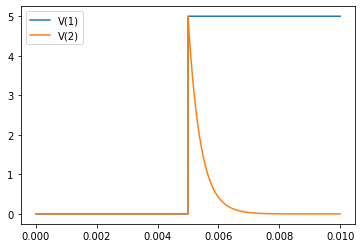

In [10]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_5_1_V.cir.prn')

plot: mem_cap_test_v_0_6_1_I.cir.prn


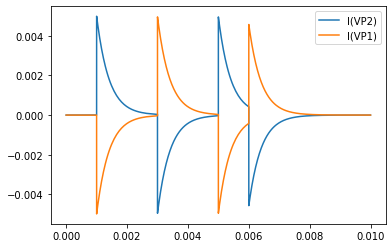

plot: mem_cap_test_v_0_6_1_V.cir.prn


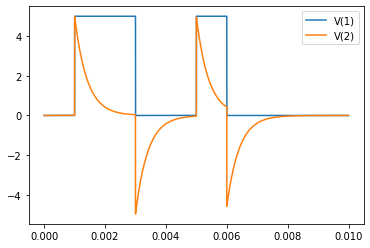

In [11]:
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_I.cir.prn')
plot_r(mem_t_dir+'/results/mem_cap_test_v_0_6_1_V.cir.prn')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_v_0_6_1.cir.log
plot: mem_cap_test_v_0_6_1.cir.prn


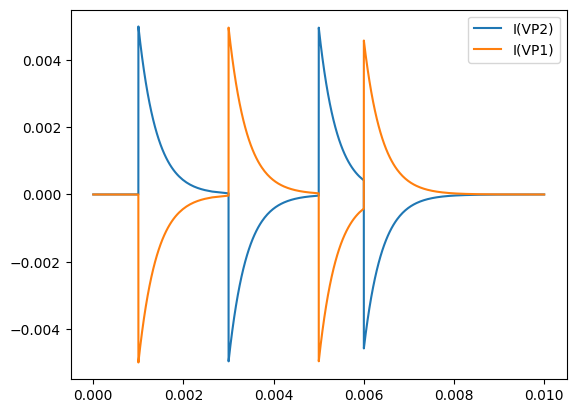

plot: mem_cap_test_v_0_6_1.cir.prn


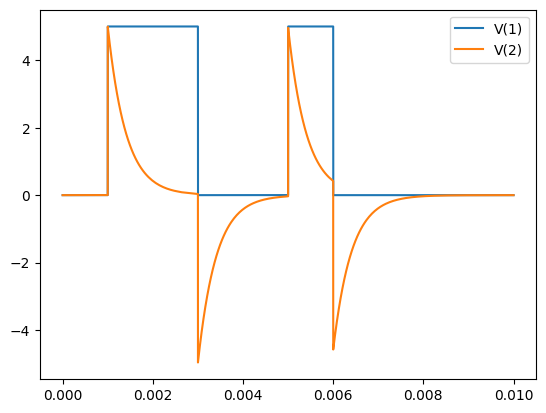

In [10]:
cir = 'mem_cap_test_v_0_6_1.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')

Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir.log
Xyce -plugin ./../../Components/verilogA_build/lib/MFXyce.so /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir > /home/u1146591/MFDA/h.r.3.3_pdk/xyce_testing/JupyterTesting/../MFlibrary_testing/stdcellTesting/membrane_cap/mem_cap_test_nlin_1_0.cir.log
plot: mem_cap_test_nlin_1_0.cir.prn


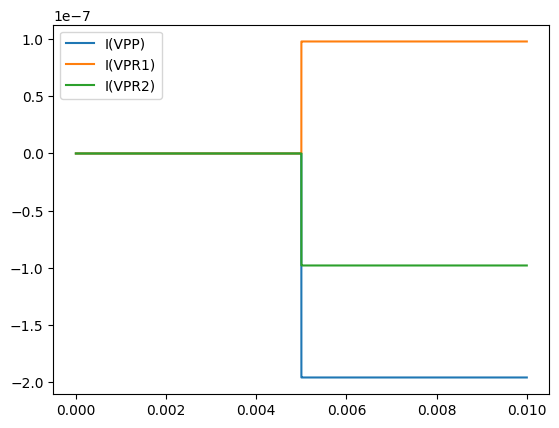

plot: mem_cap_test_nlin_1_0.cir.prn


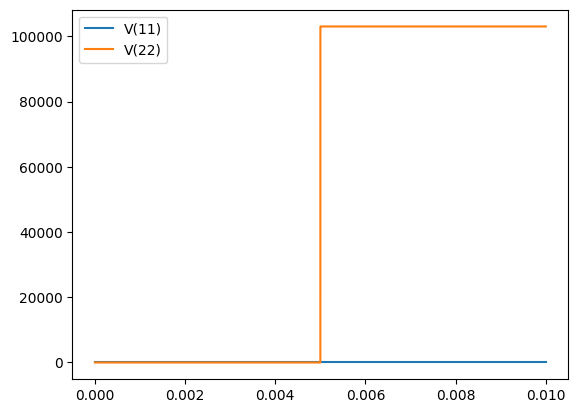

In [16]:
cir = 'mem_cap_test_nlin_1_0.cir'
run_and_plot(lib, cir, plot_type="flow")
plot_r(mem_t_dir+'/results/'+cir+'.prn', plot_type='voltage')